In [2]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def map_terrain(size):
    terrain = np.zeros((size,size)) 
    for i in range(size):
        for  j in range(size):
            x=random.random()
            if x<0.2:
                terrain[i,j]= 100 #Flat terrain
            elif x<0.5:
                terrain[i,j]= 101 #hilly terrain
            elif x<0.8:
                terrain[i,j]= 102 #forested terrain
            else:
                terrain[i,j]= 103 #maze of caves terrain
    target_loc_row= random.randint(0,size-1)
    target_loc_col=random.randint(0,size-1)
    
    return terrain,(target_loc_row,target_loc_col)

In [4]:
#Function to queary search cell
def query(terrain,search_cell):
    landscape= terrain[0]
    target_loc= terrain[1] # target location
    
    #print(landscape,target_loc)
    if search_cell !=target_loc:
        return False
    else:
        if landscape[search_cell]==100:
            if random.uniform(0, 1)<0.1:
                return False
            
        elif landscape[search_cell]==101:
            if random.uniform(0, 1)<0.3:
                return False
            
        elif landscape[search_cell]==102:
            if random.uniform(0, 1)<0.7:
                return False
            
        elif landscape[search_cell]==103:
            if random.uniform(0, 1)<0.9:
                return False
        return True   

In [5]:
#function for assigning target in specified terrain
def map_specific_Target_Terrain(size,target_terrain_loc):
    terrain = np.zeros((size,size)) 
    for i in range(size):
        for  j in range(size):
            x=random.random()
            if x<0.2:
                terrain[i,j]= 100 #Flat terrain
            elif x<0.5:
                terrain[i,j]= 101 #hilly terrain
            elif x<0.8:
                terrain[i,j]= 102 #forested terrain
            else:
                terrain[i,j]= 103 #maze of caves terrain
    if target_terrain_loc == 100:           
        result = list(zip(*np.where(terrain == 100.0)))
        target_loc=random.choice(result)
        target_loc_row=target_loc[0]
        target_loc_col=target_loc[1]
    if target_terrain_loc == 101:           
        result = list(zip(*np.where(terrain == 101.0)))
        target_loc=random.choice(result)
        target_loc_row=target_loc[0]
        target_loc_col=target_loc[1]
    if target_terrain_loc == 102:           
        result = list(zip(*np.where(terrain == 102.0)))
        target_loc=random.choice(result)
        target_loc_row=target_loc[0]
        target_loc_col=target_loc[1]
    if target_terrain_loc == 103:           
        result = list(zip(*np.where(terrain == 103.0)))
        target_loc=random.choice(result)
        target_loc_row=target_loc[0]
        target_loc_col=target_loc[1]
    
    
    return terrain,(target_loc_row,target_loc_col)

In [6]:
# function for selection of decision rule
def decision_rule_selection():
    print("Enter decision rule to select search cell: a] 1 for Rule 1(agent 1) b]2 for Rule 2(agent 2) c] 3 for Rule 3(agent 3)")
    x= int(input())
    
    if x == 1:
        return 1
    elif x == 2:
        return 2
    elif x == 3:
        return 3
    elif x == 4:
        return 4
    else:
        print("Invalid selection")

In [7]:
#compute probability table for rule 1 using Bayes Theorm
def compute_prob(terrain,prob_table,f_n_r,search_cell,size):
    
    terrian_of_selected_cell= int(terrain[0][search_cell]%100)
    #print(terrian_of_selected_cell)#to get false negative rate of terrain, if the value of cell is 102,so
    f_n_r_of_search_cell= f_n_r[terrian_of_selected_cell]  #102%100 = 2, then we will query f_n_r[2] to get its false negative rate
                                                        #we have arranged the false negative rate accordingly in the list 
    cdr= (1-prob_table[search_cell])+(prob_table[search_cell]*f_n_r_of_search_cell) #common divison factor
    for i in range(size):
        for j in range(size):
            if (i,j) != search_cell:
                prob_table[i][j]=prob_table[i][j]/cdr
            else:
                prob_table[i][j]= prob_table[i][j]*f_n_r_of_search_cell/cdr
    return

In [8]:
#compute probability table for rule 2
def compute_prob_rule2(terrain,prob_table,prob_table2,f_n_r,search_cell,size):
    
    for i in range(size):
        for j in range(size):         
            x=np.int(terrain[0][i][j]%100) # to know the type of the terrain
            prob_table2[i][j]=prob_table[i][j]*(1-f_n_r[x])
    return

In [9]:
# selecting max value from prob table, giving next coordinates for searching cell
def decision_rule1(prob_table,size):
    result = list(zip(*np.where(prob_table == np.amax(prob_table))))
    new_search_loc=random.choice(result) # chossing a random location if multiple cells have max probabiltiy value
    return new_search_loc

In [10]:
# selecting max value from prob_table2, giving next coordinates for searching cell
def decision_rule2(prob_table2,size):
    result = list(zip(*np.where(prob_table2 == np.amax(prob_table2))))
    new_search_loc=random.choice(result)# chossing a random location if multiple cells have max probabiltiy value
    return new_search_loc

In [11]:
#for basic agent 3
def decision_rule3(prob_table2,search_cell,size):
    row_search_cell= search_cell[0]
    col_search_cell= search_cell[1]
    cell_list=[]
    track_min_score= 10e9
    for i in range(size):
        for j in range(size):
            score= ( 1 + (abs(row_search_cell-i) + abs(col_search_cell-j)) )/prob_table2[i][j] # (manhattan distance from current location)/(probabilityof finding target in that cell)
            if score<track_min_score:
                track_min_score=score
                cell_list=[(i,j)]
            elif score==track_min_score:
                cell_list.append((i,j))
                
    return random.choice(cell_list) # chossing a random location if multiple cells have max score value
            

In [12]:
# for modified agent
def deccison_rule_4(terrain,f_n_r,search_cell,size):
    
    terrian_of_selected_cell= int(terrain[0][search_cell]%100)
    #print(terrian_of_selected_cell)#to get false negative rate of terrain, if the value of cell is 102,so
    f_n_r_of_search_cell= f_n_r[terrian_of_selected_cell]  #102%100 = 2, then we will query f_n_r[2] to get its false negative rate
                                                        #we have arranged the false negative rate accordingly in the list 
    if terrian_of_selected_cell==0:
        num_searches=1
    if terrian_of_selected_cell==1:
        num_searches= 1
    if terrian_of_selected_cell==2:
        num_searches=int(f_n_r_of_search_cell*10)
    if terrian_of_selected_cell==3:
        num_searches=int(f_n_r_of_search_cell*10)
    return num_searches

In [14]:
# driver code for 3 basic agents
def detective(terrain,decision_rule,size):

    dim=size
    initial_belief=1/(dim*dim)
    prob_table=np.empty((dim,dim))
    prob_table.fill(float(initial_belief))
    prob_table2=np.zeros((dim,dim))
    search_counter=0
    search_i= random.randint(0,size-1)
    search_j=random.randint(0,size-1)
    search_cell=(0,0)
    #search_cell=(search_i,search_j)
    f_n_r=[0.1,0.3,0.7,0.9] #False negative rate
    q=True
    action_counter=0
    while(q):
        #print(search_cell)
        search_counter=search_counter+1
        found = query(terrain,search_cell)
        if(found):
            return search_counter+1,action_counter
        else:
            compute_prob(terrain,prob_table,f_n_r,search_cell,size) #computing belief
            compute_prob_rule2(terrain,prob_table,prob_table2,f_n_r,search_cell,size) #computing confidence
            #print(prob_table)
        if decision_rule == 1:
            next_search_loc = decision_rule1(prob_table,size)# getting next search location
            action_counter+= ((abs(search_cell[0]-next_search_loc[0]) + abs(search_cell[1]-next_search_loc[1])) )# comment when only analysing searches and not travelling action cost
            search_cell = next_search_loc
            
        elif decision_rule == 2:
            next_search_loc = decision_rule2(prob_table2,size)# getting next search location
            action_counter+= ((abs(search_cell[0]-next_search_loc[0]) + abs(search_cell[1]-next_search_loc[1])) )# comment when only analysing searches and not travelling action cost
            search_cell = next_search_loc
        
        elif decision_rule == 3:
            next_search_loc = decision_rule3(prob_table2,search_cell,size)# getting next search location
            action_counter+= ((abs(search_cell[0]-next_search_loc[0]) + abs(search_cell[1]-next_search_loc[1])) ) # comment when only analysing searches and not travelling action cost
            search_cell = next_search_loc
        
    return search_counter,action_counter    

In [71]:
# driver code for modified agent
def detective4(terrain,size):

    dim=size
    initial_belief=1/(dim*dim)
    prob_table=np.empty((dim,dim))
    prob_table.fill(float(initial_belief))
    prob_table2=np.zeros((dim,dim))
    search_counter=0
    search_i= random.randint(0,size-1)
    search_j=random.randint(0,size-1)
    search_cell=(0,0)
    f_n_r=[0.1,0.3,0.7,0.9] #False negative rate
    q=True
    action_counter=0
    while(q):
        #print(search_cell)
        no_search=deccison_rule_4(terrain,f_n_r,search_cell,size)
        for i in range (no_search):
            search_counter=search_counter+1
            found = query(terrain,search_cell)
            if(found):
                return search_counter+1,action_counter
        compute_prob(terrain,prob_table,f_n_r,search_cell,size)
        compute_prob_rule2(terrain,prob_table,prob_table2,f_n_r,search_cell,size)
        #print(prob_table)
        next_search_loc = decision_rule3(prob_table2,search_cell,size) # getting next search location
        action_counter+= ((abs(search_cell[0]-next_search_loc[0]) + abs(search_cell[1]-next_search_loc[1])) )
        search_cell = next_search_loc       
    return search_counter,action_counter    

In [95]:
track=[]
#terrain= map_terrain(size) #uncomment to run on same map

In [74]:
track.append((sum(y)/10))
print(track)

[14321.7, 9099.2]


ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (44).

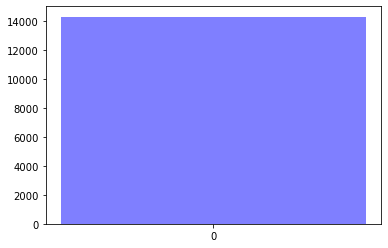

In [72]:


y = ('Searches based on Rule 2','Searches based on Rule 1',)
y_pos = np.arange(len(y))
performance = track

plt.bar(y_pos, performance, align='center',color='b', alpha=0.5)
plt.xticks(y_pos, y)
plt.ylabel('number of searches')
plt.title('Rule 1 & Rule 2 comparison')

plt.show()

In [20]:
# run the cell for generating number of actions data for all the 4 agents
size=30
agent1_actions=[]
agent2_actions=[]
agent3_actions=[]
agent4_actions=[]
for i in range(20):
    lanscape=map_terrain(size)
    for decision_rule in range(1,4):
        total=0
        search,action=detective(lanscape,decision_rule,size)
        total=search+action
        if decision_rule == 1:
            agent1_actions.append((total))
        elif decision_rule == 2:
            agent2_actions.append((total))
        elif decision_rule == 3:
            agent3_actions.append((total))
    agent4_total=0        
    agent4_search,agent4_action= detective4(lanscape,size)
    agent4_total = agent4_search+agent4_action
    agent4_actions.append((agent4_total))
print(agent1_actions,agent2_actions,agent3_actions,agent4_actions)
print((sum(agent1_actions)/20),((sum(agent2_actions))/20),(sum(agent3_actions)/20),(sum(agent4_actions)/20))

(0, 0)
(1, 1)
(2, 1)
(3, 1)
(3, 2)
(3, 3)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(3, 10)
(2, 10)
(1, 10)
(1, 11)
(1, 12)
(0, 12)
(0, 13)
(0, 14)
(1, 14)
(1, 15)
(2, 16)
(2, 17)
(3, 17)
(4, 17)
(5, 17)
(6, 17)
(6, 18)
(6, 19)
(6, 20)
(7, 20)
(7, 21)
(7, 22)
(6, 22)
(6, 24)
(6, 25)
(7, 25)
(5, 25)
(5, 26)
(4, 26)
(3, 26)
(2, 26)
(1, 26)
(1, 25)
(0, 24)
(0, 22)
(0, 20)
(1, 21)
(3, 21)
(3, 20)
(3, 19)
(4, 19)
(5, 19)
(7, 19)
(8, 19)
(8, 18)
(7, 18)
(7, 17)
(7, 15)
(8, 15)
(8, 16)
(9, 16)
(9, 17)
(9, 18)
(9, 20)
(10, 21)
(11, 21)
(11, 23)
(11, 24)
(10, 24)
(9, 24)
(9, 23)
(9, 22)
(8, 22)
(8, 24)
(8, 24)
(10, 26)
(10, 25)
(9, 26)
(9, 28)
(8, 28)
(7, 28)
(6, 27)
(5, 27)
(4, 27)
(2, 27)
(2, 29)
(1, 29)
(1, 28)
(0, 28)
(0, 27)
(0, 27)
(0, 26)
(0, 26)
(3, 24)
(4, 24)
(4, 22)
(4, 21)
(4, 21)
(4, 20)
(4, 20)
(5, 16)
(5, 14)
(5, 13)
(7, 13)
(9, 13)
(9, 12)
(10, 12)
(11, 12)
(11, 11)
(10, 10)
(11, 9)
(10, 8)
(9, 8)
(8, 8)
(7, 8)
(7, 9)
(6, 8)
(6, 7)
(6, 6)
(5, 6)
(4, 5)
(4, 7)
(4, 7)
(7, 7)
(7, 5

(22, 8)
(22, 8)
(22, 8)
(22, 8)
(22, 8)
(22, 8)
(22, 28)
(23, 28)
(23, 27)
(23, 26)
(0, 0)
(0, 1)
(1, 1)
(2, 1)
(3, 1)
(4, 1)
(4, 2)
(4, 3)
(5, 3)
(6, 3)
(6, 2)
(6, 1)
(6, 0)
(5, 1)
(5, 2)
(5, 2)
(3, 4)
(3, 5)
(3, 6)
(1, 6)
(1, 5)
(2, 4)
(2, 2)
(1, 3)
(0, 3)
(0, 4)
(0, 4)
(0, 7)
(0, 8)
(1, 8)
(1, 7)
(2, 9)
(2, 11)
(1, 11)
(1, 10)
(0, 11)
(0, 12)
(0, 14)
(0, 15)
(0, 16)
(1, 16)
(1, 17)
(2, 17)
(3, 17)
(4, 17)
(4, 18)
(3, 19)
(2, 19)
(2, 21)
(4, 21)
(5, 21)
(6, 22)
(6, 23)
(6, 24)
(5, 24)
(5, 23)
(4, 23)
(3, 23)
(2, 23)
(2, 24)
(1, 22)
(0, 22)
(0, 21)
(0, 20)
(0, 19)
(0, 18)
(1, 18)
(0, 17)
(0, 17)
(2, 16)
(2, 15)
(3, 15)
(3, 14)
(4, 13)
(5, 13)
(6, 13)
(7, 13)
(7, 12)
(8, 12)
(8, 11)
(9, 11)
(9, 12)
(10, 12)
(11, 12)
(12, 12)
(12, 13)
(13, 13)
(14, 13)
(14, 12)
(15, 12)
(15, 11)
(15, 9)
(16, 8)
(17, 8)
(18, 8)
(18, 7)
(20, 7)
(20, 6)
(19, 6)
(19, 5)
(19, 4)
(19, 3)
(19, 2)
(20, 2)
(20, 1)
(20, 0)
(21, 0)
(23, 0)
(24, 1)
(25, 2)
(25, 4)
(25, 5)
(24, 5)
(0, 0)
(0, 2)
(0, 3)
(0, 4)
(0, 5)


(22, 28)
(22, 27)
(22, 27)
(22, 27)
(19, 26)
(19, 25)
(18, 24)
(17, 24)
(17, 25)
(17, 26)
(18, 26)
(17, 27)
(17, 28)
(14, 28)
(13, 28)
(13, 28)
(13, 29)
(13, 29)
(13, 29)
(13, 24)
(13, 24)
(13, 25)
(13, 25)
(13, 26)
(13, 26)
(13, 26)
(14, 26)
(14, 19)
(16, 19)
(16, 18)
(15, 18)
(15, 16)
(16, 16)
(17, 16)
(17, 17)
(17, 18)
(17, 19)
(19, 19)
(19, 18)
(19, 17)
(18, 17)
(21, 17)
(21, 18)
(22, 18)
(22, 17)
(22, 16)
(23, 16)
(24, 16)
(25, 16)
(25, 15)
(26, 15)
(26, 14)
(27, 14)
(28, 14)
(28, 13)
(29, 13)
(29, 14)
(28, 15)
(28, 16)
(27, 16)
(26, 16)
(25, 17)
(26, 18)
(27, 18)
(28, 18)
(29, 18)
(29, 19)
(28, 19)
(28, 20)
(28, 20)
(25, 21)
(26, 21)
(26, 21)
(24, 19)
(25, 19)
(24, 20)
(24, 20)
(20, 20)
(21, 21)
(19, 21)
(18, 21)
(18, 23)
(19, 23)
(20, 24)
(20, 24)
(20, 23)
(20, 23)
(20, 22)
(20, 22)
(19, 22)
(19, 22)
(16, 22)
(16, 22)
(15, 22)
(15, 22)
(15, 21)
(15, 21)
(14, 21)
(14, 21)
(14, 21)
(13, 21)
(13, 20)
(13, 20)
(13, 19)
(13, 19)
(13, 19)
(14, 15)
(14, 14)
(16, 14)
(16, 13)
(15, 13)
(

(9, 25)
(9, 25)
(9, 26)
(9, 26)
(9, 26)
(8, 26)
(7, 26)
(7, 26)
(7, 26)
(7, 26)
(7, 26)
(7, 26)
(7, 26)
(5, 27)
(4, 27)
(3, 27)
(3, 28)
(2, 28)
(2, 28)
(2, 29)
(2, 29)
(2, 29)
(1, 27)
(1, 25)
(1, 24)
(0, 23)
(0, 23)
(1, 23)
(1, 23)
(1, 23)
(1, 23)
(1, 23)
(1, 23)
(1, 23)
(4, 23)
(4, 24)
(5, 24)
(5, 24)
(5, 23)
(5, 23)
(5, 23)
(7, 23)
(7, 23)
(8, 23)
(8, 23)
(8, 23)
(8, 23)
(8, 23)
(8, 23)
(8, 23)
(9, 23)
(9, 23)
(9, 23)
(9, 23)
(9, 23)
(9, 23)
(9, 23)
(9, 22)
(9, 22)
(9, 22)
(9, 22)
(9, 22)
(9, 22)
(9, 22)
(9, 22)
(9, 22)
(9, 22)
(9, 19)
(9, 19)
(9, 19)
(9, 19)
(8, 19)
(8, 19)
(8, 19)
(8, 19)
(8, 19)
(8, 19)
(8, 19)
(8, 19)
(8, 20)
(8, 21)
(8, 21)
(8, 21)
(8, 21)
(8, 21)
(8, 21)
(8, 21)
(7, 21)
(7, 21)
(7, 21)
(7, 21)
(7, 16)
(7, 15)
(7, 15)
(6, 15)
(6, 15)
(6, 16)
(6, 16)
(5, 16)
(5, 16)
(5, 16)
(4, 15)
(4, 15)
(5, 15)
(5, 15)
(5, 15)
(5, 15)
(5, 15)
(5, 15)
(5, 15)
(5, 14)
(5, 14)
(5, 14)
(4, 13)
(4, 13)
(3, 13)
(3, 13)
(3, 13)
(4, 11)
(4, 9)
(5, 8)
(5, 8)
(5, 8)
(5, 8)
(5, 8)
(7, 8)

(4, 28)
(4, 28)
(4, 28)
(4, 27)
(5, 27)
(5, 27)
(6, 27)
(6, 27)
(6, 26)
(6, 26)
(6, 26)
(7, 26)
(7, 28)
(7, 28)
(8, 28)
(8, 28)
(8, 28)
(9, 28)
(17, 28)
(18, 27)
(18, 27)
(17, 27)
(17, 27)
(17, 27)
(16, 27)
(16, 26)
(16, 26)
(15, 26)
(15, 26)
(15, 26)
(16, 22)
(16, 20)
(16, 20)
(15, 15)
(16, 15)
(16, 14)
(15, 13)
(15, 12)
(16, 12)
(17, 12)
(17, 11)
(16, 11)
(15, 10)
(14, 10)
(14, 11)
(11, 11)
(11, 11)
(12, 11)
(12, 11)
(12, 14)
(12, 14)
(14, 15)
(15, 16)
(15, 16)
(14, 16)
(14, 16)
(14, 17)
(14, 17)
(15, 17)
(15, 17)
(16, 17)
(16, 17)
(16, 17)
(18, 13)
(19, 12)
(19, 11)
(20, 11)
(21, 11)
(22, 11)
(23, 11)
(23, 10)
(21, 10)
(21, 9)
(22, 9)
(21, 8)
(19, 8)
(19, 7)
(18, 6)
(18, 5)
(19, 5)
(19, 4)
(20, 4)
(20, 3)
(20, 2)
(21, 2)
(22, 2)
(23, 2)
(24, 2)
(24, 3)
(23, 3)
(23, 4)
(22, 4)
(21, 5)
(21, 6)
(20, 6)
(22, 6)
(23, 6)
(23, 7)
(22, 7)
(24, 6)
(24, 5)
(25, 5)
(25, 4)
(26, 4)
(26, 5)
(28, 5)
(29, 5)
(29, 6)
(28, 7)
(27, 7)
(27, 8)
(27, 9)
(27, 10)
(28, 10)
(28, 9)
(29, 9)
(29, 11)
(28, 11

(11, 10)
(11, 12)
(10, 14)
(11, 15)
(11, 15)
(8, 16)
(7, 16)
(8, 18)
(7, 19)
(6, 19)
(5, 20)
(4, 20)
(4, 19)
(4, 18)
(5, 18)
(3, 17)
(4, 16)
(2, 16)
(1, 16)
(1, 17)
(0, 17)
(0, 16)
(0, 14)
(1, 14)
(1, 15)
(2, 13)
(1, 12)
(0, 12)
(0, 10)
(2, 10)
(2, 9)
(3, 9)
(3, 8)
(2, 8)
(1, 8)
(1, 7)
(2, 7)
(2, 6)
(1, 6)
(1, 5)
(1, 3)
(1, 1)
(1, 1)
(4, 1)
(5, 1)
(5, 1)
(6, 1)
(6, 1)
(6, 2)
(6, 2)
(6, 3)
(6, 3)
(5, 3)
(5, 3)
(5, 3)
(5, 7)
(5, 7)
(7, 8)
(7, 8)
(8, 6)
(8, 6)
(9, 6)
(9, 6)
(9, 6)
(9, 6)
(10, 5)
(10, 5)
(10, 5)
(10, 5)
(9, 4)
(9, 4)
(9, 3)
(9, 3)
(10, 3)
(10, 3)
(10, 2)
(10, 2)
(10, 1)
(10, 1)
(10, 1)
(14, 2)
(14, 2)
(13, 2)
(13, 2)
(13, 1)
(13, 1)
(14, 1)
(14, 1)
(14, 1)
(21, 1)
(22, 3)
(23, 4)
(24, 4)
(25, 4)
(27, 5)
(27, 6)
(26, 6)
(26, 6)
(23, 6)
(22, 6)
(22, 6)
(22, 9)
(22, 10)
(22, 10)
(20, 12)
(19, 12)
(18, 12)
(17, 11)
(17, 11)
(20, 11)
(20, 9)
(20, 9)
(21, 9)
(21, 9)
(21, 12)
(21, 13)
(22, 14)
(21, 15)
(22, 16)
(22, 17)
(21, 17)
(20, 17)
(19, 17)
(19, 16)
(18, 17)
(18, 18)
(18, 1

(22, 0)
(22, 0)
(23, 0)
(23, 0)
(23, 1)
(23, 1)
(23, 1)
(24, 1)
(24, 0)
(24, 0)
(24, 0)
(25, 0)
(27, 0)
(27, 0)
(27, 1)
(27, 1)
(27, 1)
(28, 1)
(29, 2)
(29, 2)
(29, 2)
(29, 2)
(28, 4)
(28, 4)
(28, 4)
(28, 4)
(26, 4)
(26, 4)
(26, 3)
(26, 3)
(26, 3)
(26, 2)
(24, 3)
(24, 3)
(23, 3)
(23, 3)
(23, 3)
(22, 3)
(23, 4)
(24, 4)
(24, 7)
(24, 7)
(23, 7)
(23, 7)
(23, 7)
(23, 8)
(21, 8)
(21, 8)
(21, 8)
(21, 8)
(21, 9)
(22, 9)
(22, 11)
(22, 11)
(22, 11)
(22, 11)
(22, 11)
(21, 12)
(20, 11)
(18, 11)
(18, 11)
(18, 11)
(18, 12)
(16, 12)
(16, 12)
(16, 12)
(15, 12)
(16, 10)
(16, 10)
(17, 10)
(17, 10)
(17, 10)
(17, 10)
(18, 9)
(18, 9)
(18, 9)
(18, 9)
(17, 8)
(17, 8)
(17, 8)
(17, 8)
(15, 7)
(15, 7)
(15, 7)
(14, 7)
(15, 5)
(15, 5)
(15, 5)
(15, 4)
(17, 4)
(17, 4)
(17, 4)
(17, 4)
(16, 3)
(16, 3)
(16, 3)
(16, 3)
(18, 3)
(18, 3)
(18, 2)
(18, 2)
(18, 2)
(18, 1)
(19, 1)
(19, 1)
(19, 1)
(19, 0)
(16, 0)
(16, 0)
(16, 0)
(16, 0)
(16, 0)
(17, 1)
(17, 2)
(17, 2)
(15, 1)
(14, 0)
(13, 0)
(12, 0)
(12, 0)
(9, 0)
(9, 0)
(10, 

(17, 0)
(17, 0)
(17, 0)
(17, 0)
(17, 0)
(17, 0)
(17, 0)
(17, 0)
(17, 0)
(17, 0)
(17, 0)
(17, 1)
(16, 1)
(16, 2)
(18, 2)
(18, 2)
(18, 2)
(18, 1)
(18, 1)
(19, 3)
(19, 3)
(19, 3)
(19, 3)
(19, 3)
(19, 3)
(19, 3)
(19, 3)
(19, 3)
(20, 4)
(20, 5)
(20, 5)
(20, 5)
(20, 5)
(20, 5)
(20, 5)
(20, 5)
(20, 5)
(19, 5)
(18, 5)
(17, 5)
(17, 4)
(17, 4)
(17, 4)
(18, 4)
(18, 7)
(18, 7)
(18, 7)
(18, 7)
(18, 7)
(18, 7)
(18, 7)
(18, 8)
(18, 8)
(18, 8)
(18, 8)
(18, 8)
(18, 8)
(18, 8)
(18, 8)
(18, 8)
(18, 8)
(18, 9)
(18, 9)
(18, 10)
(18, 10)
(18, 10)
(18, 10)
(18, 10)
(18, 10)
(18, 10)
(18, 11)
(18, 11)
(18, 11)
(18, 11)
(16, 11)
(16, 11)
(16, 11)
(16, 11)
(16, 11)
(16, 11)
(16, 11)
(16, 12)
(16, 12)
(16, 12)
(17, 12)
(17, 12)
(17, 12)
(17, 12)
(17, 12)
(17, 12)
(17, 12)
(17, 12)
(17, 13)
(18, 13)
(18, 12)
(20, 12)
(22, 12)
(22, 12)
(22, 12)
(22, 12)
(22, 12)
(22, 12)
(22, 12)
(22, 13)
(22, 13)
(22, 13)
(23, 13)
(23, 13)
(24, 13)
(24, 13)
(24, 13)
(24, 13)
(24, 13)
(24, 13)
(24, 13)
(24, 13)
(24, 13)
(24, 13)
(

(6, 1)
(6, 1)
(7, 1)
(7, 1)
(7, 1)
(7, 1)
(7, 1)
(7, 1)
(7, 1)
(8, 1)
(8, 1)
(8, 1)
(8, 1)
(8, 1)
(8, 1)
(8, 1)
(8, 1)
(9, 1)
(9, 2)
(9, 3)
(9, 3)
(10, 3)
(10, 3)
(11, 3)
(11, 3)
(11, 2)
(11, 2)
(11, 1)
(11, 0)
(11, 0)
(11, 0)
(11, 0)
(11, 0)
(11, 0)
(11, 0)
(11, 0)
(11, 0)
(11, 0)
(11, 0)
(11, 0)
(11, 0)
(11, 0)
(10, 0)
(10, 0)
(10, 0)
(10, 0)
(10, 0)
(8, 0)
(7, 0)
(6, 0)
(4, 0)
(4, 0)
(4, 0)
(3, 0)
(3, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 2)
(2, 3)
(2, 3)
(2, 3)
(2, 3)
(2, 3)
(2, 3)
(2, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(4, 2)
(4, 2)
(4, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(0, 0)
(1, 0)
(1, 1)
(0, 2)
(0, 3)
(1, 3)
(1, 4)
(1, 5)
(2, 4)
(3, 4)
(4, 4)
(4, 3)
(3, 3)
(5, 3)
(6, 3)
(6, 4)
(7, 4)
(8, 4)
(9, 4)
(10, 4)
(10, 5)
(10, 6)
(11, 6)
(12, 5)
(12, 3)
(11, 3)
(10, 3)
(9, 2)
(9, 1)
(9, 0)
(8, 0)
(7, 0)
(7, 1)
(7, 2)
(5, 2)
(5, 1)
(6, 1)
(4, 1)
(4, 2)
(4, 2)
(4, 6)
(3, 6)
(3, 7)
(2, 7)
(1, 7)
(1, 8)


(1, 21)
(2, 21)
(3, 22)
(3, 22)
(4, 22)
(4, 22)
(4, 22)
(4, 23)
(4, 24)
(4, 25)
(4, 25)
(4, 25)
(5, 25)
(5, 23)
(5, 21)
(5, 21)
(5, 21)
(4, 21)
(4, 20)
(4, 19)
(5, 19)
(5, 18)
(4, 18)
(4, 17)
(4, 17)
(3, 17)
(3, 17)
(3, 17)
(3, 17)
(4, 16)
(4, 16)
(4, 16)
(5, 16)
(5, 15)
(10, 15)
(10, 15)
(9, 13)
(9, 13)
(9, 12)
(9, 12)
(9, 12)
(14, 12)
(15, 11)
(15, 11)
(15, 10)
(15, 10)
(15, 10)
(16, 10)
(16, 9)
(14, 9)
(14, 9)
(14, 9)
(14, 8)
(15, 8)
(15, 8)
(15, 7)
(15, 7)
(15, 7)
(15, 7)
(18, 7)
(18, 7)
(18, 7)
(18, 6)
(18, 5)
(18, 4)
(18, 4)
(19, 4)
(19, 4)
(20, 4)
(20, 4)
(21, 4)
(21, 4)
(24, 4)
(24, 4)
(24, 3)
(24, 3)
(24, 2)
(24, 2)
(23, 2)
(23, 2)
(23, 3)
(23, 3)
(23, 4)
(23, 4)
(22, 4)
(22, 4)
(22, 4)
(22, 4)
(22, 6)
(22, 6)
(22, 7)
(22, 7)
(23, 7)
(23, 7)
(23, 7)
(24, 7)
(24, 6)
(24, 6)
(25, 6)
(25, 6)
(25, 6)
(25, 5)
(26, 5)
(26, 5)
(26, 4)
(26, 4)
(26, 4)
(28, 2)
(28, 2)
(28, 1)
(28, 1)
(27, 1)
(27, 1)
(27, 0)
(27, 0)
(27, 0)
(26, 0)
(25, 0)
(25, 0)
(25, 0)
(25, 1)
(24, 1)
(24, 1)
(23, 1)

(2, 12)
(2, 9)
(1, 8)
(1, 8)
(2, 8)
(2, 8)
(4, 9)
(5, 9)
(5, 9)
(5, 6)
(5, 6)
(5, 7)
(5, 7)
(5, 7)
(6, 7)
(6, 7)
(6, 8)
(6, 8)
(7, 8)
(7, 8)
(7, 9)
(7, 9)
(7, 10)
(7, 11)
(8, 11)
(8, 12)
(8, 13)
(8, 15)
(9, 15)
(9, 15)
(9, 15)
(9, 18)
(9, 18)
(10, 18)
(10, 18)
(10, 18)
(10, 18)
(10, 18)
(10, 18)
(10, 18)
(12, 19)
(13, 19)
(13, 19)
(13, 19)
(13, 20)
(13, 20)
(13, 20)
(14, 20)
(14, 19)
(14, 19)
(16, 18)
(16, 18)
(17, 18)
(17, 18)
(17, 18)
(17, 18)
(17, 18)
(17, 18)
(17, 18)
(17, 19)
(17, 19)
(17, 19)
(17, 19)
(17, 19)
(17, 19)
(17, 19)
(17, 19)
(16, 19)
(16, 20)
(15, 20)
(15, 22)
(15, 22)
(15, 22)
(15, 22)
(15, 22)
(15, 22)
(15, 22)
(15, 23)
(15, 23)
(15, 23)
(15, 23)
(15, 23)
(15, 23)
(15, 23)
(16, 25)
(17, 25)
(17, 25)
(17, 26)
(17, 27)
(19, 27)
(20, 27)
(21, 28)
(21, 28)
(21, 29)
(21, 29)
(21, 29)
(20, 29)
(20, 29)
(21, 29)
(21, 28)
(21, 28)
(21, 28)
(21, 28)
(22, 28)
(22, 28)
(22, 28)
(23, 28)
(23, 28)
(23, 27)
(23, 27)
(24, 27)
(24, 27)
(25, 27)
(25, 27)
(25, 27)
(26, 26)
(27, 26)
(

(16, 20)
(16, 19)
(16, 19)
(16, 19)
(16, 19)
(18, 19)
(18, 19)
(18, 20)
(18, 20)
(18, 20)
(18, 25)
(18, 26)
(18, 27)
(19, 27)
(19, 26)
(19, 26)
(16, 26)
(16, 28)
(18, 28)
(18, 28)
(18, 28)
(24, 28)
(23, 28)
(23, 27)
(25, 26)
(25, 25)
(26, 25)
(27, 25)
(27, 24)
(28, 23)
(28, 22)
(29, 22)
(29, 24)
(29, 25)
(29, 27)
(28, 27)
(28, 28)
(27, 28)
(27, 29)
(25, 29)
(26, 28)
(26, 27)
(26, 27)
(25, 27)
(25, 27)
(24, 25)
(24, 24)
(24, 24)
(23, 24)
(23, 24)
(23, 24)
(24, 20)
(24, 19)
(25, 19)
(26, 18)
(25, 18)
(25, 18)
(24, 18)
(24, 18)
(23, 16)
(23, 15)
(22, 16)
(21, 16)
(21, 16)
(20, 16)
(20, 16)
(20, 17)
(20, 17)
(20, 17)
(20, 18)
(21, 18)
(22, 18)
(22, 18)
(23, 18)
(23, 18)
(23, 18)
(23, 18)
(24, 16)
(24, 16)
(24, 16)
(23, 16)
(22, 16)
(22, 15)
(22, 15)
(22, 15)
(23, 15)
(24, 15)
(25, 15)
(25, 15)
(25, 15)
(25, 14)
(26, 14)
(26, 14)
(26, 13)
(26, 13)
(29, 13)
(29, 13)
(29, 7)
(29, 6)
(28, 6)
(28, 7)
(28, 5)
(26, 5)
(26, 5)
(26, 6)
(26, 6)
(25, 6)
(25, 6)
(25, 5)
(25, 5)
(24, 5)
(24, 5)
(24, 5)

(20, 14)
(21, 14)
(22, 14)
(23, 13)
(24, 13)
(24, 13)
(21, 13)
(21, 13)
(18, 13)
(18, 13)
(19, 16)
(19, 17)
(19, 18)
(20, 18)
(20, 17)
(21, 17)
(21, 17)
(25, 17)
(25, 16)
(25, 16)
(26, 18)
(26, 18)
(25, 18)
(25, 18)
(25, 23)
(25, 22)
(24, 24)
(25, 25)
(26, 26)
(24, 26)
(24, 26)
(24, 25)
(24, 25)
(20, 25)
(19, 25)
(17, 25)
(18, 24)
(17, 23)
(16, 24)
(16, 24)
(15, 24)
(15, 24)
(15, 24)
(14, 29)
(13, 29)
(12, 29)
(11, 29)
(10, 29)
(10, 27)
(11, 26)
(9, 25)
(8, 25)
(7, 25)
(7, 26)
(7, 27)
(6, 27)
(5, 26)
(4, 26)
(3, 26)
(2, 26)
(2, 27)
(2, 28)
(1, 28)
(1, 29)
(2, 29)
(0, 29)
(0, 27)
(1, 27)
(1, 25)
(0, 26)
(0, 26)
(1, 26)
(1, 26)
(2, 23)
(3, 23)
(4, 23)
(5, 22)
(5, 21)
(6, 21)
(7, 21)
(7, 22)
(8, 22)
(9, 22)
(10, 22)
(10, 21)
(10, 20)
(9, 20)
(9, 19)
(10, 19)
(10, 17)
(11, 17)
(9, 17)
(7, 17)
(6, 17)
(6, 16)
(6, 15)
(5, 14)
(4, 14)
(4, 13)
(3, 13)
(2, 12)
(1, 12)
(1, 11)
(2, 11)
(2, 10)
(2, 8)
(1, 8)
(1, 7)
(2, 7)
(2, 6)
(1, 5)
(0, 5)
(0, 7)
(0, 9)
(0, 10)
(3, 9)
(4, 8)
(4, 10)
(5, 10)
(5,

(4, 24)
(4, 24)
(4, 24)
(4, 24)
(4, 24)
(0, 25)
(0, 25)
(0, 25)
(0, 25)
(0, 25)
(0, 27)
(1, 27)
(1, 28)
(2, 28)
(3, 28)
(4, 28)
(4, 28)
(4, 29)
(4, 29)
(5, 29)
(5, 29)
(5, 29)
(2, 29)
(0, 29)
(0, 29)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(1, 26)
(1, 26)
(1, 26)
(1, 26)
(1, 24)
(1, 24)
(2, 24)
(2, 24)
(2, 24)
(2, 24)
(2, 25)
(2, 25)
(2, 25)
(2, 25)
(2, 25)
(2, 25)
(2, 25)
(3, 25)
(3, 25)
(3, 25)
(4, 25)
(4, 25)
(4, 25)
(4, 25)
(4, 25)
(4, 25)
(4, 25)
(7, 25)
(8, 25)
(8, 25)
(8, 20)
(8, 20)
(7, 20)
(7, 20)
(7, 19)
(7, 19)
(6, 19)
(6, 19)
(5, 19)
(5, 19)
(5, 18)
(5, 18)
(6, 18)
(6, 18)
(7, 18)
(7, 18)
(7, 18)
(7, 18)
(6, 20)
(6, 20)
(6, 20)
(6, 21)
(7, 21)
(7, 20)
(7, 20)
(8, 20)
(8, 20)
(8, 20)
(9, 19)
(10, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(10, 21)
(10, 21)
(9, 21)
(9, 21)
(9, 21)
(9, 21)
(9, 21)
(9, 21)
(9, 21)
(8, 21)
(8, 21)
(8, 21)
(8, 21)
(8, 21)
(8, 21)
(8, 21)
(8, 21)
(8, 21)
(8, 21)
(7, 23)
(7, 23)
(7, 24)
(7, 24)
(6, 24)


(18, 5)
(17, 6)
(16, 6)
(15, 6)
(14, 6)
(14, 7)
(15, 7)
(16, 7)
(17, 7)
(17, 8)
(17, 9)
(18, 9)
(18, 10)
(19, 10)
(20, 10)
(20, 11)
(21, 11)
(21, 10)
(22, 9)
(23, 8)
(24, 7)
(25, 7)
(25, 6)
(25, 5)
(26, 5)
(27, 5)
(27, 6)
(27, 7)
(27, 8)
(28, 8)
(29, 9)
(29, 10)
(29, 12)
(29, 13)
(29, 14)
(29, 15)
(28, 15)
(28, 14)
(28, 13)
(27, 13)
(27, 11)
(25, 11)
(25, 12)
(26, 12)
(26, 10)
(25, 9)
(24, 9)
(24, 11)
(22, 12)
(21, 12)
(21, 13)
(19, 13)
(19, 12)
(18, 12)
(17, 12)
(16, 12)
(16, 11)
(17, 11)
(16, 9)
(13, 9)
(12, 9)
(12, 8)
(13, 8)
(14, 8)
(14, 8)
(13, 10)
(12, 10)
(11, 10)
(11, 12)
(12, 12)
(12, 13)
(13, 13)
(14, 13)
(15, 13)
(15, 14)
(15, 15)
(14, 15)
(14, 16)
(13, 16)
(12, 16)
(12, 15)
(11, 15)
(10, 15)
(10, 16)
(9, 16)
(9, 15)
(9, 13)
(8, 13)
(7, 13)
(7, 14)
(7, 15)
(6, 15)
(6, 16)
(5, 16)
(5, 17)
(4, 16)
(4, 15)
(4, 14)
(5, 14)
(5, 12)
(4, 12)
(2, 12)
(2, 11)
(1, 11)
(0, 11)
(0, 12)
(0, 13)
(1, 13)
(1, 12)
(2, 13)
(2, 14)
(2, 15)
(1, 15)
(1, 14)
(0, 14)
(0, 17)
(1, 16)
(2, 16)
(3, 16

(1, 27)
(1, 27)
(1, 27)
(2, 27)
(3, 27)
(3, 26)
(3, 25)
(4, 25)
(4, 25)
(4, 25)
(4, 25)
(4, 25)
(2, 25)
(1, 25)
(1, 26)
(0, 25)
(0, 23)
(0, 23)
(0, 23)
(0, 23)
(0, 23)
(0, 21)
(0, 21)
(3, 21)
(4, 21)
(4, 20)
(4, 20)
(5, 20)
(5, 20)
(5, 21)
(5, 21)
(6, 21)
(6, 21)
(7, 21)
(7, 21)
(8, 21)
(8, 21)
(9, 21)
(9, 21)
(9, 21)
(9, 21)
(9, 23)
(9, 23)
(9, 24)
(9, 24)
(9, 25)
(9, 25)
(9, 25)
(10, 25)
(10, 26)
(10, 27)
(10, 27)
(10, 27)
(11, 27)
(12, 27)
(12, 27)
(12, 27)
(12, 28)
(13, 28)
(13, 27)
(13, 26)
(13, 26)
(13, 26)
(14, 26)
(14, 27)
(15, 27)
(15, 26)
(16, 25)
(16, 25)
(16, 25)
(16, 24)
(15, 24)
(15, 24)
(15, 24)
(15, 24)
(14, 22)
(14, 22)
(14, 22)
(14, 23)
(13, 23)
(13, 22)
(12, 22)
(11, 22)
(10, 22)
(10, 23)
(7, 23)
(7, 23)
(7, 23)
(7, 22)
(6, 22)
(6, 21)
(6, 21)
(5, 19)
(5, 19)
(5, 19)
(4, 19)
(3, 18)
(3, 18)
(3, 18)
(3, 18)
(3, 17)
(3, 17)
(3, 17)
(3, 20)
(2, 20)
(1, 20)
(1, 20)
(1, 19)
(1, 19)
(1, 19)
(1, 19)
(1, 18)
(1, 18)
(1, 18)
(1, 18)
(1, 18)
(1, 18)
(1, 18)
(1, 17)
(1, 17)
(1,

(13, 5)
(13, 5)
(13, 5)
(13, 4)
(13, 4)
(13, 4)
(13, 4)
(13, 4)
(13, 4)
(13, 4)
(13, 3)
(13, 3)
(13, 3)
(10, 3)
(10, 3)
(10, 2)
(10, 2)
(10, 2)
(10, 2)
(11, 2)
(11, 2)
(11, 2)
(11, 2)
(11, 2)
(11, 2)
(11, 2)
(11, 3)
(11, 3)
(11, 3)
(10, 3)
(10, 3)
(10, 4)
(10, 4)
(10, 4)
(10, 4)
(10, 4)
(10, 4)
(10, 4)
(9, 4)
(9, 4)
(9, 4)
(9, 4)
(9, 4)
(9, 4)
(9, 4)
(9, 4)
(9, 3)
(9, 2)
(8, 2)
(8, 1)
(8, 1)
(8, 1)
(8, 0)
(9, 0)
(9, 0)
(9, 0)
(9, 0)
(9, 0)
(9, 0)
(9, 0)
(9, 0)
(9, 0)
(9, 0)
(12, 0)
(12, 0)
(12, 0)
(11, 0)
(11, 0)
(11, 0)
(11, 1)
(11, 1)
(11, 1)
(11, 1)
(11, 1)
(11, 1)
(11, 1)
(11, 1)
(12, 1)
(12, 2)
(12, 2)
(12, 2)
(12, 2)
(12, 2)
(12, 2)
(12, 2)
(12, 2)
(12, 2)
(12, 2)
(12, 2)
(13, 1)
(13, 1)
(13, 1)
(13, 1)
(13, 1)
(13, 1)
(13, 1)
(13, 1)
(13, 1)
(13, 1)
(14, 1)
(14, 1)
(15, 1)
(15, 1)
(15, 1)
(15, 1)
(15, 1)
(15, 1)
(15, 1)
(15, 1)
(15, 1)
(15, 1)
(15, 1)
(17, 1)
(17, 1)
(17, 1)
(17, 0)
(17, 0)
(17, 0)
(17, 0)
(17, 0)
(17, 0)
(17, 0)
(18, 0)
(18, 0)
(22, 0)
(22, 0)
(22, 0)
(23, 0)
(

(11, 19)
(11, 20)
(12, 20)
(12, 19)
(12, 19)
(13, 19)
(13, 18)
(13, 18)
(14, 18)
(14, 20)
(14, 20)
(14, 21)
(14, 21)
(13, 21)
(13, 22)
(13, 23)
(12, 23)
(12, 23)
(11, 23)
(9, 23)
(9, 23)
(9, 24)
(9, 24)
(9, 24)
(9, 25)
(9, 25)
(9, 25)
(9, 26)
(9, 26)
(9, 26)
(9, 26)
(9, 26)
(9, 26)
(9, 26)
(8, 26)
(8, 26)
(8, 26)
(8, 26)
(8, 26)
(8, 26)
(8, 26)
(7, 26)
(7, 26)
(7, 26)
(7, 26)
(7, 27)
(7, 28)
(8, 28)
(9, 28)
(9, 28)
(9, 28)
(9, 29)
(8, 29)
(6, 29)
(6, 29)
(6, 29)
(6, 29)
(6, 29)
(6, 29)
(6, 29)
(5, 29)
(5, 29)
(5, 29)
(5, 28)
(0, 0)
(0, 2)
(0, 3)
(1, 3)
(1, 4)
(3, 4)
(3, 5)
(4, 5)
(4, 6)
(5, 6)
(5, 7)
(4, 7)
(4, 8)
(5, 8)
(6, 8)
(7, 8)
(7, 9)
(8, 9)
(8, 8)
(8, 7)
(8, 6)
(7, 6)
(7, 5)
(7, 4)
(6, 4)
(6, 3)
(5, 3)
(4, 3)
(5, 2)
(5, 1)
(6, 1)
(6, 0)
(6, 2)
(8, 1)
(8, 0)
(10, 0)
(11, 0)
(11, 2)
(12, 2)
(12, 3)
(12, 4)
(12, 5)
(11, 5)
(11, 6)
(10, 6)
(10, 5)
(9, 5)
(9, 4)
(9, 3)
(10, 3)
(10, 4)
(11, 3)
(13, 3)
(14, 3)
(15, 3)
(15, 2)
(15, 1)
(15, 0)
(14, 0)
(14, 0)
(18, 0)
(19, 0)
(19, 1)
(20

(0, 4)
(0, 4)
(0, 4)
(0, 3)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 3)
(2, 3)
(4, 4)
(4, 4)
(4, 4)
(4, 5)
(3, 5)
(2, 5)
(2, 5)
(2, 4)
(2, 4)
(2, 4)
(2, 4)
(2, 9)
(2, 9)
(2, 10)
(2, 10)
(2, 10)
(2, 10)
(2, 12)
(2, 12)
(2, 13)
(2, 13)
(2, 13)
(2, 14)
(3, 14)
(3, 14)
(3, 14)
(3, 15)
(3, 17)
(3, 17)
(3, 17)
(4, 20)
(4, 20)
(3, 22)
(3, 22)
(0, 23)
(0, 24)
(0, 26)
(1, 26)
(2, 26)
(2, 25)
(3, 25)
(3, 26)
(3, 26)
(1, 28)
(2, 28)
(2, 29)
(2, 29)
(0, 28)
(0, 27)
(0, 27)
(1, 27)
(1, 27)
(2, 27)
(2, 27)
(2, 27)
(5, 28)
(5, 28)
(6, 26)
(7, 25)
(8, 24)
(7, 23)
(7, 22)
(7, 22)
(9, 23)
(9, 23)
(10, 23)
(10, 23)
(11, 23)
(11, 23)
(11, 23)
(11, 22)
(12, 22)
(12, 22)
(12, 22)
(13, 22)
(16, 22)
(16, 22)
(16, 23)
(16, 23)
(16, 24)
(16, 24)
(16, 24)
(17, 24)
(17, 22)
(17, 22)
(17, 22)
(17, 22)
(16, 22)
(16, 22)
(16, 23)
(15, 23)
(15, 21)
(15, 20)
(14, 20)
(14, 20)
(14, 20)
(14, 21)
(13, 19)
(13, 19)
(12, 19)
(12, 19)
(12, 18)
(12, 18)
(13, 18)
(13, 18)
(13, 18)
(13, 18)
(10, 18)
(10, 18)
(10, 19)
(10, 19)
(10, 19)


(11, 27)
(7, 27)
(5, 26)
(5, 26)
(4, 26)
(4, 26)
(0, 25)
(0, 24)
(1, 24)
(1, 23)
(1, 22)
(2, 22)
(2, 23)
(2, 23)
(0, 22)
(0, 22)
(0, 18)
(1, 18)
(2, 18)
(2, 17)
(2, 16)
(1, 16)
(1, 15)
(1, 14)
(1, 13)
(1, 12)
(0, 12)
(0, 11)
(1, 10)
(1, 8)
(0, 7)
(0, 6)
(0, 5)
(1, 6)
(3, 6)
(5, 6)
(5, 5)
(5, 7)
(6, 7)
(7, 6)
(7, 8)
(5, 8)
(5, 8)
(7, 10)
(7, 12)
(6, 12)
(6, 14)
(7, 14)
(7, 13)
(7, 13)
(3, 13)
(2, 13)
(2, 12)
(3, 12)
(4, 11)
(4, 11)
(5, 11)
(5, 11)
(5, 15)
(5, 16)
(4, 16)
(4, 15)
(3, 15)
(3, 17)
(4, 17)
(6, 16)
(9, 16)
(10, 16)
(10, 18)
(10, 19)
(10, 19)
(9, 19)
(9, 19)
(9, 18)
(9, 18)
(9, 17)
(9, 17)
(8, 15)
(8, 15)
(10, 14)
(10, 14)
(10, 13)
(10, 13)
(12, 12)
(12, 11)
(12, 9)
(13, 9)
(14, 8)
(14, 6)
(15, 6)
(15, 5)
(15, 4)
(16, 4)
(17, 4)
(17, 3)
(16, 3)
(16, 2)
(15, 1)
(15, 0)
(14, 0)
(13, 0)
(13, 1)
(13, 2)
(13, 3)
(12, 2)
(11, 2)
(11, 1)
(10, 1)
(10, 0)
(11, 0)
(11, 0)
(10, 3)
(10, 4)
(10, 5)
(9, 4)
(9, 2)
(10, 2)
(10, 2)
(11, 6)
(11, 7)
(11, 7)
(13, 5)
(14, 5)
(16, 5)
(16, 7)
(17, 

In [24]:
track_agent_perform=[]
track_agent_perform.append(sum(agent1_actions)/20)
track_agent_perform.append(sum(agent2_actions)/20)
track_agent_perform.append(sum(agent3_actions)/20)
track_agent_perform.append(sum(agent4_actions)/20)
print(track_agent_perform)

[69549.2, 19090.85, 8791.2, 5164.7]


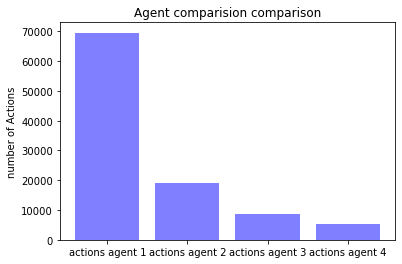

In [26]:

y = ('actions agent 1','actions agent 2','actions agent 3','actions agent 4')
y_pos = np.arange(len(y))
performance = track_agent_perform

plt.bar(y_pos, performance, align='center',color='b', alpha=0.5)
plt.xticks(y_pos, y)
plt.ylabel('number of Actions')
plt.title('Agent comparision comparison')

plt.show()

In [60]:
result=[]
data=[]

In [67]:
#simulating for terrain specific target (we will manually pass terrain for target everytime)for agent 1 2 and 3
size=20
total=0
for j in range(10):
    terrain= map_specific_Target_Terrain(size,103) #(size, terrain of target)
    result1,action1=detective(terrain,3,size) # change the middle argument depending updon which rule you want to run
    total=result1+action1 # only adding searches + actions not the actions
    result.append(total)

In [68]:
data.append(sum(result)/10)
print(data)

[494.1, 1331.4, 3411.2, 7042.8]


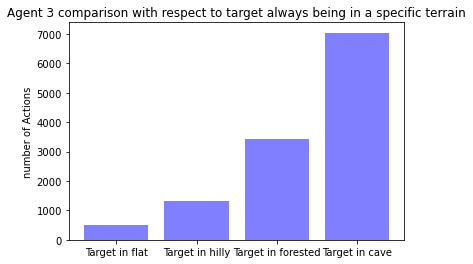

In [69]:
#plotting results for terrain specific performance for agent 1,2 and 3 manually
y = ('Target in flat','Target in hilly','Target in forested','Target in cave')
y_pos = np.arange(len(data))
performance = data

plt.bar(y_pos, performance, align='center',color='b', alpha=0.5)
plt.xticks(y_pos, y)
plt.ylabel('number of Actions')
plt.title('Agent 3 comparison with respect to target always being in a specific terrain')

plt.show()

In [86]:
result_ag4=[] # data holder for agent 4
data_ag4=[]# data holder for agent 4

In [94]:
#simulating for terrain specific target (we will manually pass terrain for target everytime) for agent 4
size=20
total=0
for j in range(10):
    terrain= map_specific_Target_Terrain(size,103) #(size, terrain of target)
    result1,action1=detective4(terrain,size) # change the middle argument depending updon which rule you want to run
    total=result1+action1 # only adding searches + actions not the actions
    result_ag4.append(total)
print((sum(result_ag4)/10))

18410.2


In [97]:
data_ag4.append(sum(result_ag4)/30)
print(data_ag4)

[294.1, 7070.2, 3937.96, 6136.733333333334]


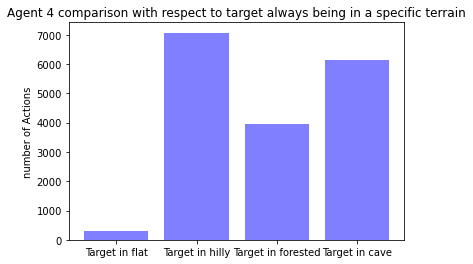

In [98]:
#plotting results for terrain specific performance for agent 4
y = ('Target in flat','Target in hilly','Target in forested','Target in cave')
y_pos = np.arange(len(data_ag4))
performance = data_ag4

plt.bar(y_pos, performance, align='center',color='b', alpha=0.5)
plt.xticks(y_pos, y)
plt.ylabel('number of Actions')
plt.title('Agent 4 comparison with respect to target always being in a specific terrain')

plt.show()